<a href="https://www.kaggle.com/code/thirumani/dragons-den-uk-data-analysis?scriptVersionId=193889686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:maroon;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;"> 🇬🇧 Dragons' Den UK Exploratory Data Analysis (EDA) 🐉</p>
## Dataset https://www.kaggle.com/datasets/thirumani/dragons-den-uk-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2024-Aug-24 with Python version
Python 3.10.14


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/9/99/DragonsDenUK17.png', width=430, height=240)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/dragons-den-uk-dataset/
dragons_den = pd.read_csv('/kaggle/input/dragons-den-uk-dataset/Dragons Den UK dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = dragons_den.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 84
-rw-r--r-- 1 nobody nogroup 83153 Aug 24 14:50 'Dragons Den UK dataset.csv'

There are 416 rows and 53 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
dragons_den.head(5)

Season Number                    Startup Name  Episode Number  \
0              1                        Umbrolly               1   
1              1                      GrailsLtd1               2   
2              1                       LeBeanock               3   
3              1  IVCam,IndustrialControlSystems               3   
4              1              MycorrhizalSystems               4   

   Pitch Number Season Start Season End Original Air Date           Industry  \
0             1     4-Jan-05   8-Feb-05          4-Jan-05  Business Services   
1             2     4-Jan-05   8-Feb-05         11-Jan-05     Fashion/Beauty   
2             3     4-Jan-05   8-Feb-05         18-Jan-05     Lifestyle/Home   
3             4     4-Jan-05   8-Feb-05         18-Jan-05  Business Services   
4             5     4-Jan-05   8-Feb-05         25-Jan-05    Green/CleanTech   

                                Business Description  Company Website  \
0  Multimedia vending unit selling umbrellas and ...              NaN   
1                Tailor-made suits for businesswomen              NaN   
2                                  A beanbag hammock              NaN   
3      A 3D measuring system using camera technology              NaN   
4                            Land for a truffle farm              NaN   

   Pitchers Gender  Pitchers Average Age  Pitchers City  Pitchers State  \
0              NaN                   NaN            NaN             NaN   
1              NaN                   NaN            NaN             NaN   
2              NaN                   NaN            NaN             NaN   
3              NaN                   NaN            NaN             NaN   
4              NaN                   NaN            NaN             NaN   

       Entrepreneur Names  Multiple Entrepreneurs  UK Viewership  \
0           Charles Ejogo                       0            NaN   
1       Tracey Ann Graily                       0            NaN   
2         Tracie Herrtage                       0            NaN   
3  John and Phillip Petty                       1            NaN   
4             Paul Thomas                       0            NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0               150000                     40.0               375000   
1               120000                     40.0               300000   
2                54000                     49.0               110204   
3                50000                     30.0               166667   
4                75000                     25.0               300000   

   Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
0         1           150000.0               40.0        375000.0   
1         1           120000.0               40.0        300000.0   
2         1            54000.0               49.0        110204.0   
3         0                NaN                NaN             NaN   
4         0                NaN                NaN             NaN   

   Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
0                        2.0  ...                     NaN   NaN   
1                        2.0  ...                     NaN   NaN   
2                        1.0  ...                     NaN   NaN   
3                        NaN  ...                     NaN   NaN   
4                        NaN  ...                     NaN   NaN   

   Deal Has Conditions  Peter Jones Investment Amount  \
0                  NaN                        75000.0   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

   Peter Jones Investment Equity Deborah Meaden Investment Amount  \
0                           20.0                              NaN   
1                            NaN                              NaN   
2            

In [6]:
dragons_den.tail(10).T

406  \
Season Number                                              21   
Startup Name                                       Myo Master   
Episode Number                                              9   
Pitch Number                                              407   
Season Start                                         4-Jan-24   
Season End                                           4-Apr-24   
Original Air Date                                   29-Feb-24   
Industry                                                  NaN   
Business Description                 Sports recovery products   
Company Website                                           NaN   
Pitchers Gender                                           NaN   
Pitchers Average Age                                      NaN   
Pitchers City                                             NaN   
Pitchers State                                            NaN   
Entrepreneur Names                  Joe Gray and Lottie White   
Multiple Entrepreneurs                                      1   
UK Viewership                                             NaN   
Original Ask Amount                                    100000   
Original Offered Equity                                  10.0   
Valuation Requested                                   1000000   
Got Deal                                                    0   
Total Deal Amount                                         NaN   
Total Deal Equity                                         NaN   
Deal Valuation                                            NaN   
Number of Dragons in Deal                                 NaN   
Investment Amount Per Dragon                              NaN   
Equity Per Dragon                                         NaN   
Royalty Deal                                              NaN   
Advisory Shares Equity                                    NaN   
Loan                                                      NaN   
Deal Has Conditions                                       NaN   
Peter Jones Investment Amount                             NaN   
Peter Jones Investment Equity                             NaN   
Deborah Meaden Investment Amount                          NaN   
Deborah Meaden Investment Equity                          NaN   
Duncan Bannatyne Investment Amount                        NaN   
Duncan Bannatyne Investment Equity                        NaN   
Theo Paphitis Investment Amount                           NaN   
Theo Paphitis Investment Equity                           NaN   
Touker Suleyman Investment Amount                         NaN   
Touker Suleyman Investment Equity                         NaN   
Sara Davies Investment Amount                             NaN   
Sara Davies Investment Equity                             NaN   
Guest Investment Amount                                   NaN   
Guest Investment Equity                                   NaN   
Invested Guest Name                                       NaN   
Peter Jones Present                                       NaN   
Deborah Meaden Present                                    NaN   
Duncan Bannatyne Present                                  NaN   
Theo Paphitis Present                                     NaN   
Touker Suleyman Present                                   NaN   
Sara Davies Present                                       NaN   
Guest Present                                             NaN   

                                                       407  \
Season Number                                           21   
Startup Name                             Zebedee Any Angle   
Episode Number                                          10   
Pitch Number                                           408   
Season Start                                      4-Jan-24   
Season End                                        4-Apr-24   
Original Air Date                                 7-Mar-24   
Industry                                           

In [7]:
dragons_den['Season Number'] = dragons_den['Season Number'].astype(pd.Int32Dtype())
dragons_den['Episode Number'] = dragons_den['Episode Number'].astype(pd.Int32Dtype())
dragons_den['Pitch Number'] = dragons_den['Pitch Number'].astype(pd.Int32Dtype())

dragons_den['Startup Name'] = dragons_den['Startup Name'].astype(str)
dragons_den['Industry'] = dragons_den['Industry'].astype(str)
dragons_den['Business Description'] = dragons_den['Business Description'].astype(str)

dragons_den['Multiple Entrepreneurs'] = dragons_den['Multiple Entrepreneurs'].astype(pd.Int32Dtype())
dragons_den['Got Deal'] = dragons_den['Got Deal'].astype(pd.Int32Dtype())

In [8]:
dragons_den.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
dragons_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       416 non-null    Int32  
 1   Startup Name                        416 non-null    object 
 2   Episode Number                      416 non-null    Int32  
 3   Pitch Number                        416 non-null    Int32  
 4   Season Start                        416 non-null    object 
 5   Season End                          416 non-null    object 
 6   Original Air Date                   416 non-null    object 
 7   Industry                            416 non-null    object 
 8   Business Description                416 non-null    object 
 9   Company Website                     0 non-null      float64
 10  Pitchers Gender                     0 non-null      float64
 11  Pitchers Average Age                0 non-nul

In [10]:
dragons_den.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in dragons_den.columns:
    print("Number of unique values in", col, "-", dragons_den[col].nunique())

Number of unique values in Season Number - 21
Number of unique values in Startup Name - 416
Number of unique values in Episode Number - 16
Number of unique values in Pitch Number - 416
Number of unique values in Season Start - 21
Number of unique values in Season End - 21
Number of unique values in Original Air Date - 234
Number of unique values in Industry - 16
Number of unique values in Business Description - 416
Number of unique values in Company Website - 0
Number of unique values in Pitchers Gender - 0
Number of unique values in Pitchers Average Age - 0
Number of unique values in Pitchers City - 0
Number of unique values in Pitchers State - 0
Number of unique values in Entrepreneur Names - 416
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in UK Viewership - 1
Number of unique values in Original Ask Amount - 39
Number of unique values in Original Offered Equity - 35
Number of unique values in Valuation Requested - 112
Number of unique values in Got D

In [12]:
# Latest/current season data
dragons_den_recent = dragons_den.loc[(dragons_den['Season Number']==21)]

In [13]:
# Data set information
print(dragons_den['Season Number'].max(), "total seasons in UK Dragons' Den\n")
print(dragons_den['Pitch Number'].max(), "#startups came for pitching \n")

21 total seasons in UK Dragons' Den

416 #startups came for pitching 



Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
Episode Number   6   5   8   6   9   8   8  10  10  13  12  12  15  16  14   

Season Number   16  17  18  19  20  21  
Episode Number  15  14  14  14  14  14  


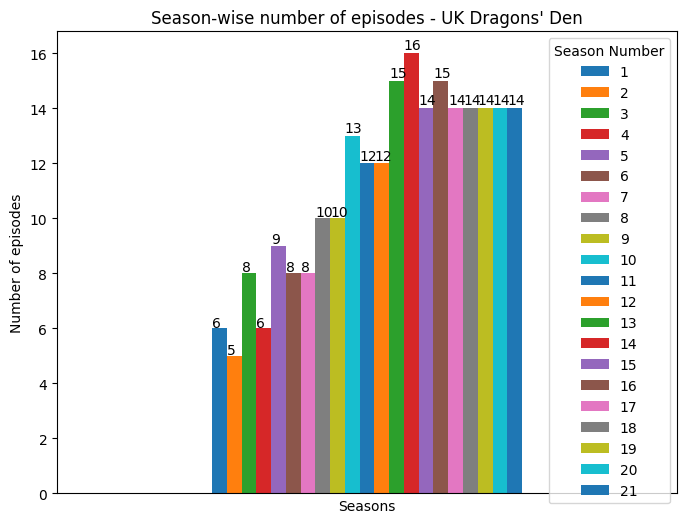

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(dragons_den, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(8,6), title="Season-wise number of episodes - UK Dragons' Den")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = dragons_den['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den UK - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=510, height=680)
fig.update_yaxes(tickvals=list(range(22)))
fig.update_xaxes(visible=False)
fig.show()

In [16]:
# There were 1 to 4 pitches, in a each episode
print(dragons_den[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[1 2 3 4]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = dragons_den['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den British - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# Types of industries, came for investment, in current/latest season (21st series)
tmp = dragons_den_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> UK Dragons' Den in current/latest season (21st series) - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [19]:
# All seasons averages
pivot = pd.pivot_table(dragons_den, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in GBP and equity in %

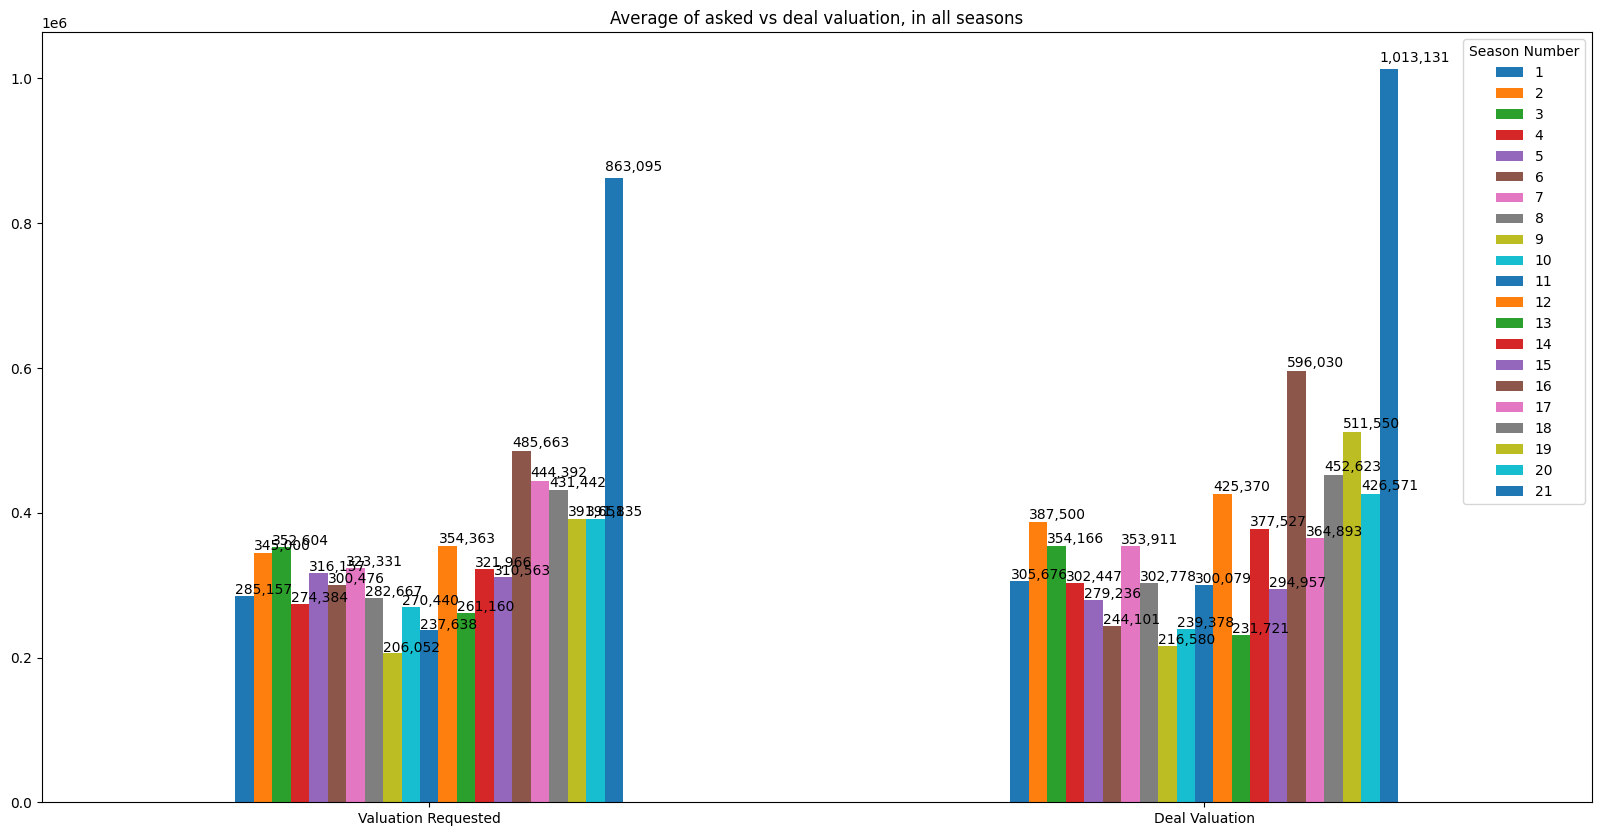

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(dragons_den, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

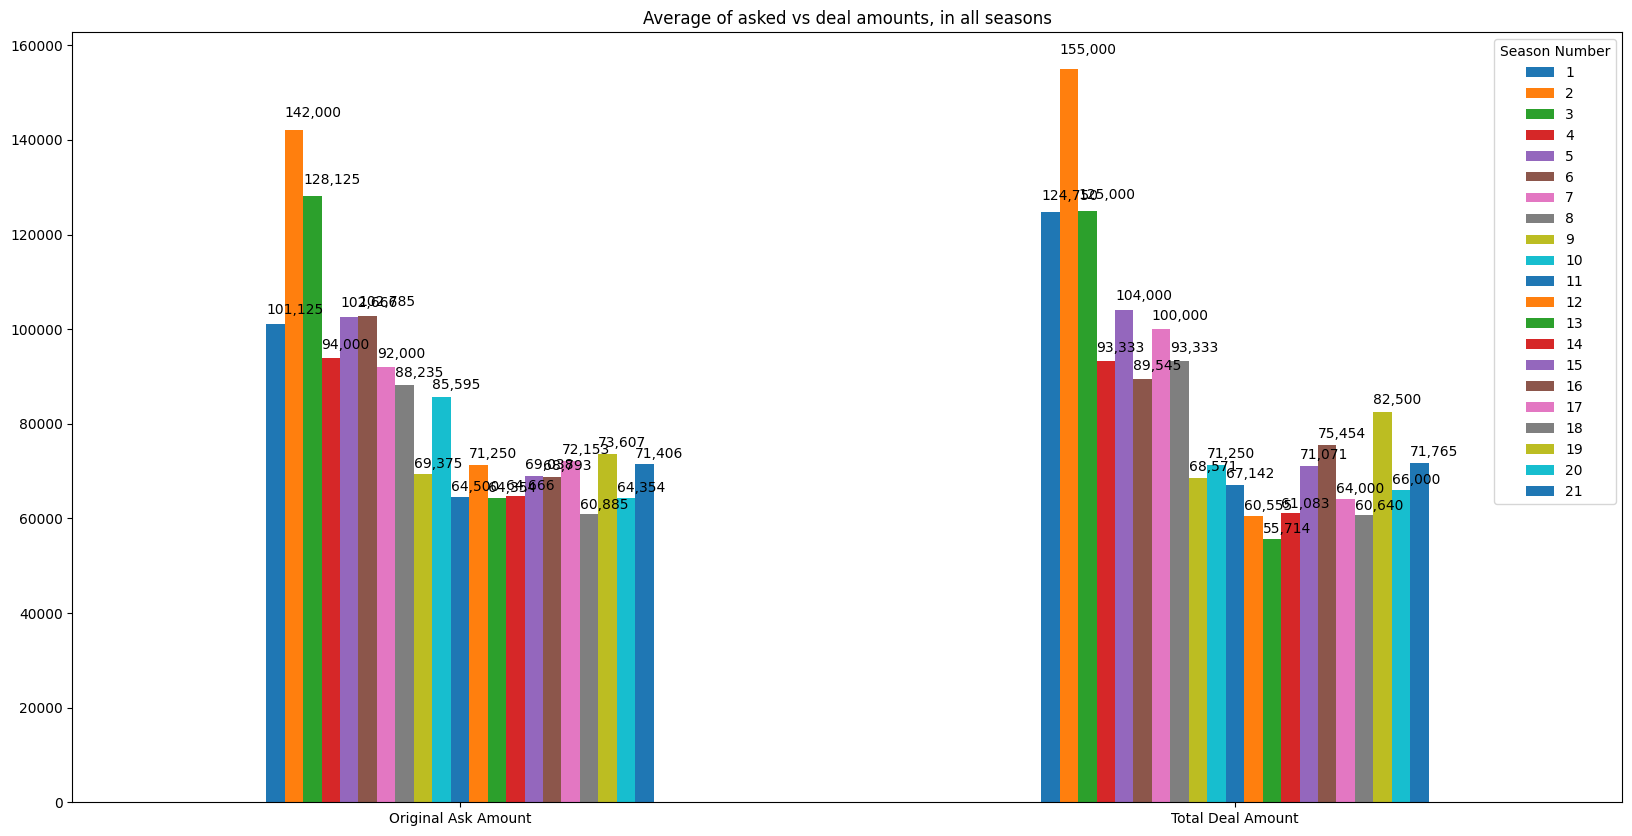

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(dragons_den, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

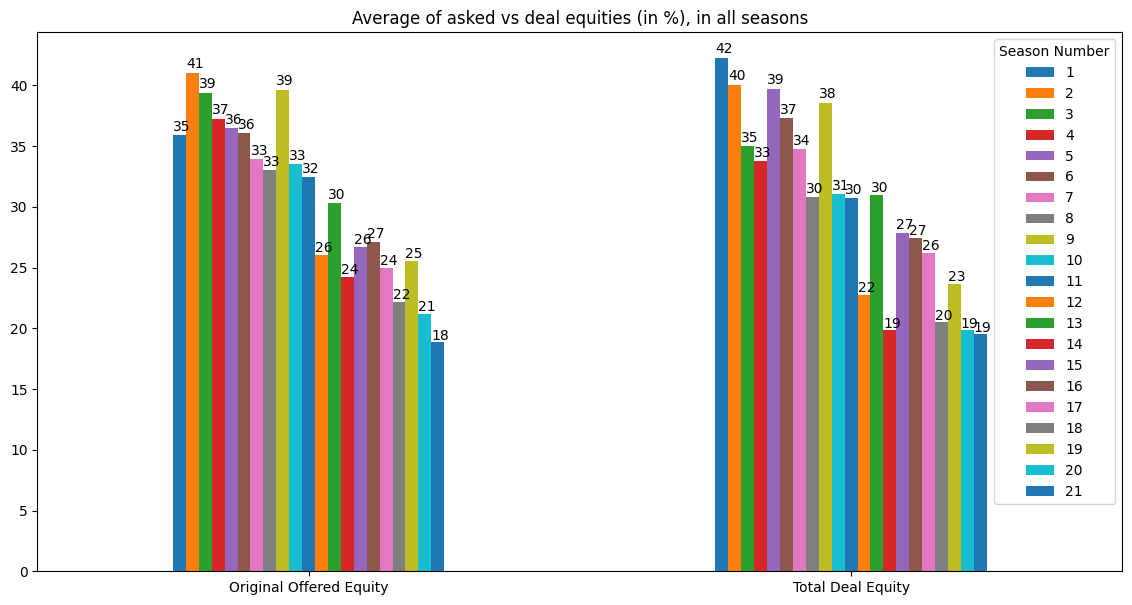

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(dragons_den, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(14,7), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [23]:
# # Gender wise
# print(dragons_den['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# dragons_den["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [24]:
# # Age wise
# print(dragons_den['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# dragons_den["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

### 💹 49% companies received offers and 51% startups could not convince Sharks to invest

Got Deal
0    211
1    205
Name: count, dtype: Int64 

Got Deal
0    51%
1    49%
Name: proportion, dtype: object


Text(0, 0.5, '')

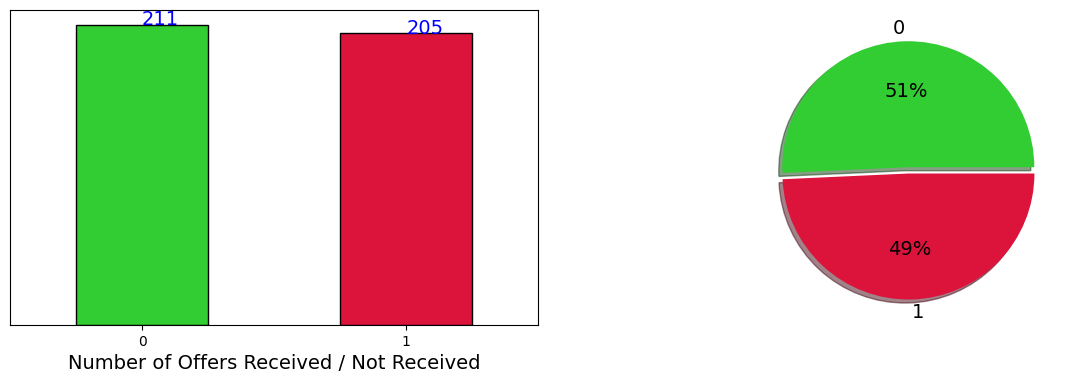

In [25]:
# Offers received
print(dragons_den['Got Deal'].value_counts(), "\n")
print(round(dragons_den['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
dragons_den["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 205 companies received offers & 211 startups could not convince #Dragons to invest.

In [26]:
# # Gender wise distribution, who received the offer
# print(dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [27]:
# # Gender wise distribution, who could NOT receive the offer
# print(dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

In [28]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].max(), 'GBP', locale='en_UK').replace(".00", ""))

Maximum amount requested, by a pitcher - £250,000


In [29]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].min(), 'GBP', locale='en_UK').replace(".00", ""))

Least amount requested, by a pitcher - £5


In [30]:
# Sum of investment amount asked, in Dragons' Den UK
print("Sum of investment amount asked, by all startup companies, in UK Dragons' Den -", format_currency(dragons_den['Original Ask Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in UK Dragons' Den - £31,683,505


In [31]:
# Amount invested by all Dragons, in UK Dragons' Den
print("Amount invested by all Dragons, in Dragons' Den UK -", format_currency(dragons_den['Total Deal Amount'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Amount invested by all Dragons, in Dragons' Den UK - £15,299,005


In [32]:
# Sum of loan/debt amount, in American Dragons' Den
print("Sum of loan/debt amount, given by all Dragons, in American Dragons' Den -", format_currency(dragons_den['Loan'].sum(), 'GBP', locale='en_UK').replace(".00", ""))

Sum of loan/debt amount, given by all Dragons, in American Dragons' Den - £0


In [33]:
# Top 15 investments, as per total investment/deal amount
print(dragons_den.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

tmpdf = dragons_den.sort_values('Total Deal Amount', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest investment as per deal amount", text=tmpdf['Total Deal Amount'].map(float).map(str))
fig.show()

Startup Name
KimaÃ¯                        250000.0
GamingAlerts                  200000.0
ProWasteManagementServices    200000.0
TheWandCompany                200000.0
VisualTalentLtd               175000.0
Igloo                         160000.0
TheGeneratingCompany          160000.0
Big Clothing 4 You            150000.0
Cheesegeek                    150000.0
ElectroExpo                   150000.0
Extend Robotics               150000.0
MixAlbum                      150000.0
Mo Bros                       150000.0
Rapstrap                      150000.0
SquareMile                    150000.0
Name: Total Deal Amount, dtype: float64


In [34]:
# Top 20 investments, as per total equity/shares percentage diluted
print(dragons_den.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = dragons_den.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
RKARecords                 79.0
BareNakedFoods             50.0
BeamBlock                  50.0
Blindsinabox               50.0
CaribbeanReadyMeals        50.0
Cordina Hair               50.0
FitFurLife                 50.0
Liquiproof                 50.0
Rapstrap                   50.0
T Plus                     50.0
Beach Powder Ltd           49.0
LeBeanock                  49.0
Sweet-EscottAviationLtd    49.0
Little Hoppa by Sophie     45.0
LoveDaPop                  45.0
Nimble                     45.0
ParkingPerx                45.0
Peggy Rain Ltd             45.0
RemPods                    45.0
SlappieLtd                 45.0
Name: Total Deal Equity, dtype: float64


In [35]:
# Startups who sold (exactly) 1/3rd of their company (equity) to Dragons
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Startup Name"]].count())
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name    1
dtype: int64
     Season Number  Startup Name  Total Deal Equity
260             16  Didsbury Gin               33.3


In [36]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ][["Season Number","Startup Name","Total Deal Amount", "Total Deal Equity"]])

tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name    66
dtype: int64
     Season Number       Startup Name  Total Deal Amount  Total Deal Equity
0                1           Umbrolly           150000.0               40.0
1                1         GrailsLtd1           120000.0               40.0
2                1          LeBeanock            54000.0               49.0
7                1    VisualTalentLtd           175000.0               40.0
8                2         SquareMile           150000.0               40.0
..             ...                ...                ...                ...
363             20         Haze Cards            35000.0               35.0
386             21     Peggy Rain Ltd            80000.0               45.0
393             21       Pavan Beauty            50000.0               40.0
407             21  Zebedee Any Angle            75000.0               40.0
415             21    Yard Art UK Ltd            50000.0               35.0

[66 rows x 4 columns]


In [37]:
# # Startups who got Debt/loan amount
# print("Number of startups who got debt/loan amount", dragons_den['Loan'].count(),"\n")

# dragons_den.loc[dragons_den['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

In [38]:
# # Startups who gave Royalty
# print("Number of startups who gave Royalty", dragons_den['Royalty Deal'].count(),"\n")

# dragons_den.loc[dragons_den['Royalty Deal'] == 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

In [39]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", dragons_den['Advisory Shares Equity'].count(),"\n")

dragons_den.loc[dragons_den['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 1 



Season Number Startup Name  Total Deal Amount  Total Deal Equity  \
405             21      Sibstar           125000.0               10.0   

     Advisory Shares Equity  
405                    10.0

In [40]:
# Deals with conditions
print("Number of startups who accepted conditional deals", dragons_den['Deal Has Conditions'].count(),"\n")

dragons_den.loc[dragons_den['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 37 



Season Number           Startup Name  Total Deal Amount  \
8                2             SquareMile           150000.0   
115             10           InternAvenue           100000.0   
117             10              WoodBlocX            75000.0   
133             11                RemPods           100000.0   
156             12             ZevenMedia            50000.0   
167             13             Accentuate            45000.0   
169             13               Sync-box            55000.0   
192             14          Iveson & Sage            78000.0   
193             14      The Snaffling Pig            70000.0   
195             14               Cocofina            75000.0   
196             14    Kokoso Skin Limited            50000.0   
199             14            Active Away            25000.0   
205             14      Watmuff & Beckett            75000.0   
221             15            ShakeSphere            75000.0   
222             15              B-Tempted            75000.0   
235             16                  VIVIT            90000.0   
262             16             Oatein Ltd            50000.0   
280             17                 Nimble            85000.0   
290             18                Offblak            70000.0   
310             18              Owen Drew            50000.0   
318             18         Mini First Aid            50000.0   
319             18               Nobu Pet            50000.0   
322             18         Positive Birth           136000.0   
324             18   The Workbench London            50000.0   
325             19             Cheesegeek           150000.0   
329             19           Piddle Patch            50000.0   
343             19                 Toddle            60000.0   
345             19         Let's Sanitise            80000.0   
350             19        Caffeine Bullet            60000.0   
368             20  Clear ânâ Collect            50000.0   
372             20    Redcote Leisure Ltd           100000.0   
378             20               Botanycl            60000.0   
386             21         Peggy Rain Ltd            80000.0   
393             21           Pavan Beauty            50000.0   
403             21            Tasty Mates            60000.0   
407             21      Zebedee Any Angle            75000.0   
415             21        Yard Art UK Ltd            50000.0   

     Total Deal Equity  
8                 40.0  
115               40.0  
117               25.0  
133               45.0  
156               25.0  
167               40.0  
169               35.0  
192               25.0  
193               20.0  
195               20.0  
196               30.0  
199               20.0  
205               20.0  
221               30.0  
222               40.0  
235               20.0  
262               25.0  
280               45.0  
290               10.0  
310               30.0  
318               20.0  
319               35.0  
322               10.0  
324               45.0  
325                7.5  
329               30.0  
343               13.0  
345               25.0  
350               25.0  
368               25.0  
372               15.0  
378               25.0  
386               45.0  
393               40.0  
403               20.0  
407               40.0  
415               35.0

In [41]:
# # Gender/age wise pitchers combination
# dragons_den.groupby([dragons_den['Pitchers Gender'], dragons_den['Pitchers Average Age'], dragons_den['Multiple Entrepreneurs']]).size().nlargest(10)

# # Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

## 💰 Which shark invested most ?

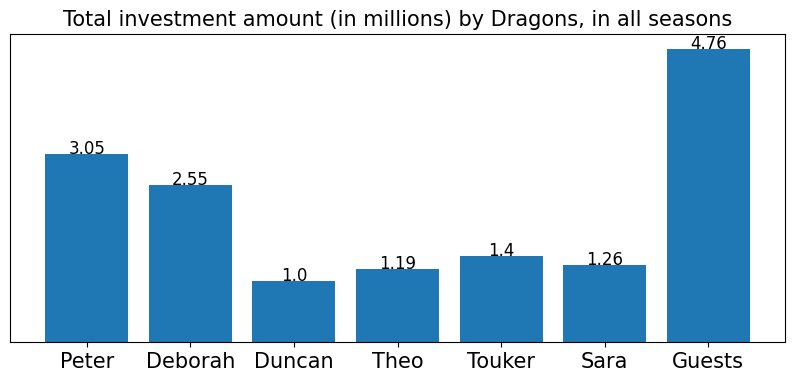

In [42]:
# Amount Invested by Dragons, in all seasons
Amount = [(dragons_den['Peter Jones Investment Amount']/1000000).sum(), (dragons_den['Deborah Meaden Investment Amount']/1000000).sum(), (dragons_den['Duncan Bannatyne Investment Amount']/1000000).sum(), (dragons_den['Theo Paphitis Investment Amount']/1000000).sum(),
    (dragons_den['Touker Suleyman Investment Amount']/1000000).sum(), (dragons_den['Sara Davies Investment Amount']/1000000).sum(), (dragons_den['Guest Investment Amount']/1000000).sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Dragons, in all seasons", fontsize=15)
plt.show()

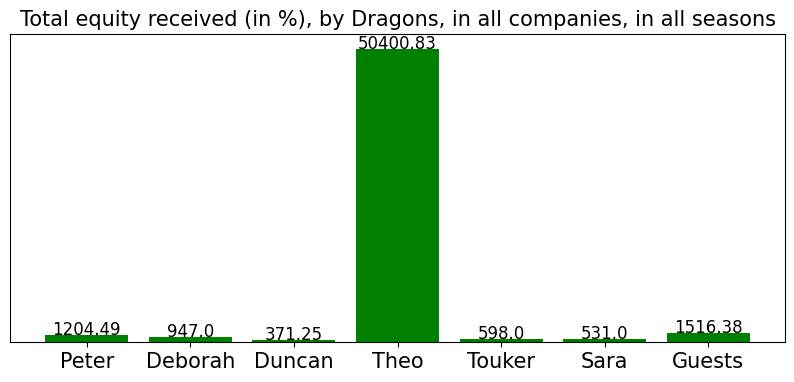

In [43]:
# Equity received by Dragons, in all seasons
Equity = [dragons_den['Peter Jones Investment Equity'].sum(), dragons_den['Deborah Meaden Investment Equity'].sum(), dragons_den['Duncan Bannatyne Investment Equity'].sum(), dragons_den['Theo Paphitis Investment Equity'].sum(),
    dragons_den['Touker Suleyman Investment Equity'].sum(), dragons_den['Sara Davies Investment Equity'].sum(), dragons_den['Guest Investment Equity'].sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Dragons, in all companies, in all seasons", fontsize=15)
plt.show()

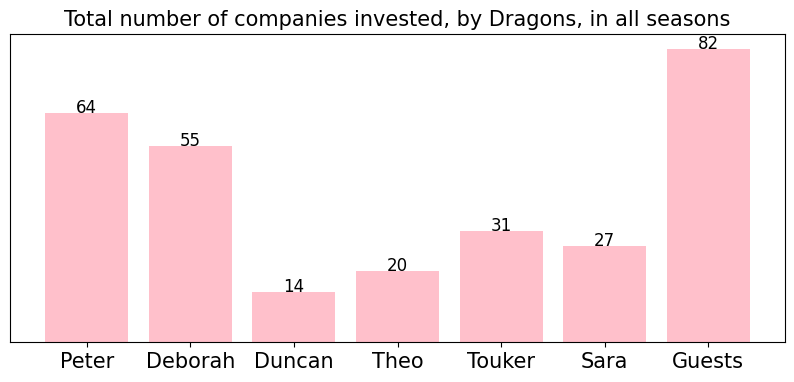

In [44]:
# Number of companies invested, in all seasons
Amount = [(dragons_den['Peter Jones Investment Amount']).count(), (dragons_den['Deborah Meaden Investment Amount']).count(), (dragons_den['Duncan Bannatyne Investment Amount']).count(), (dragons_den['Theo Paphitis Investment Amount']).count(),
    (dragons_den['Touker Suleyman Investment Amount']).count(), (dragons_den['Sara Davies Investment Amount']).count(), (dragons_den['Guest Investment Amount']).count()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Dragons, in all seasons", fontsize=15)
plt.show()

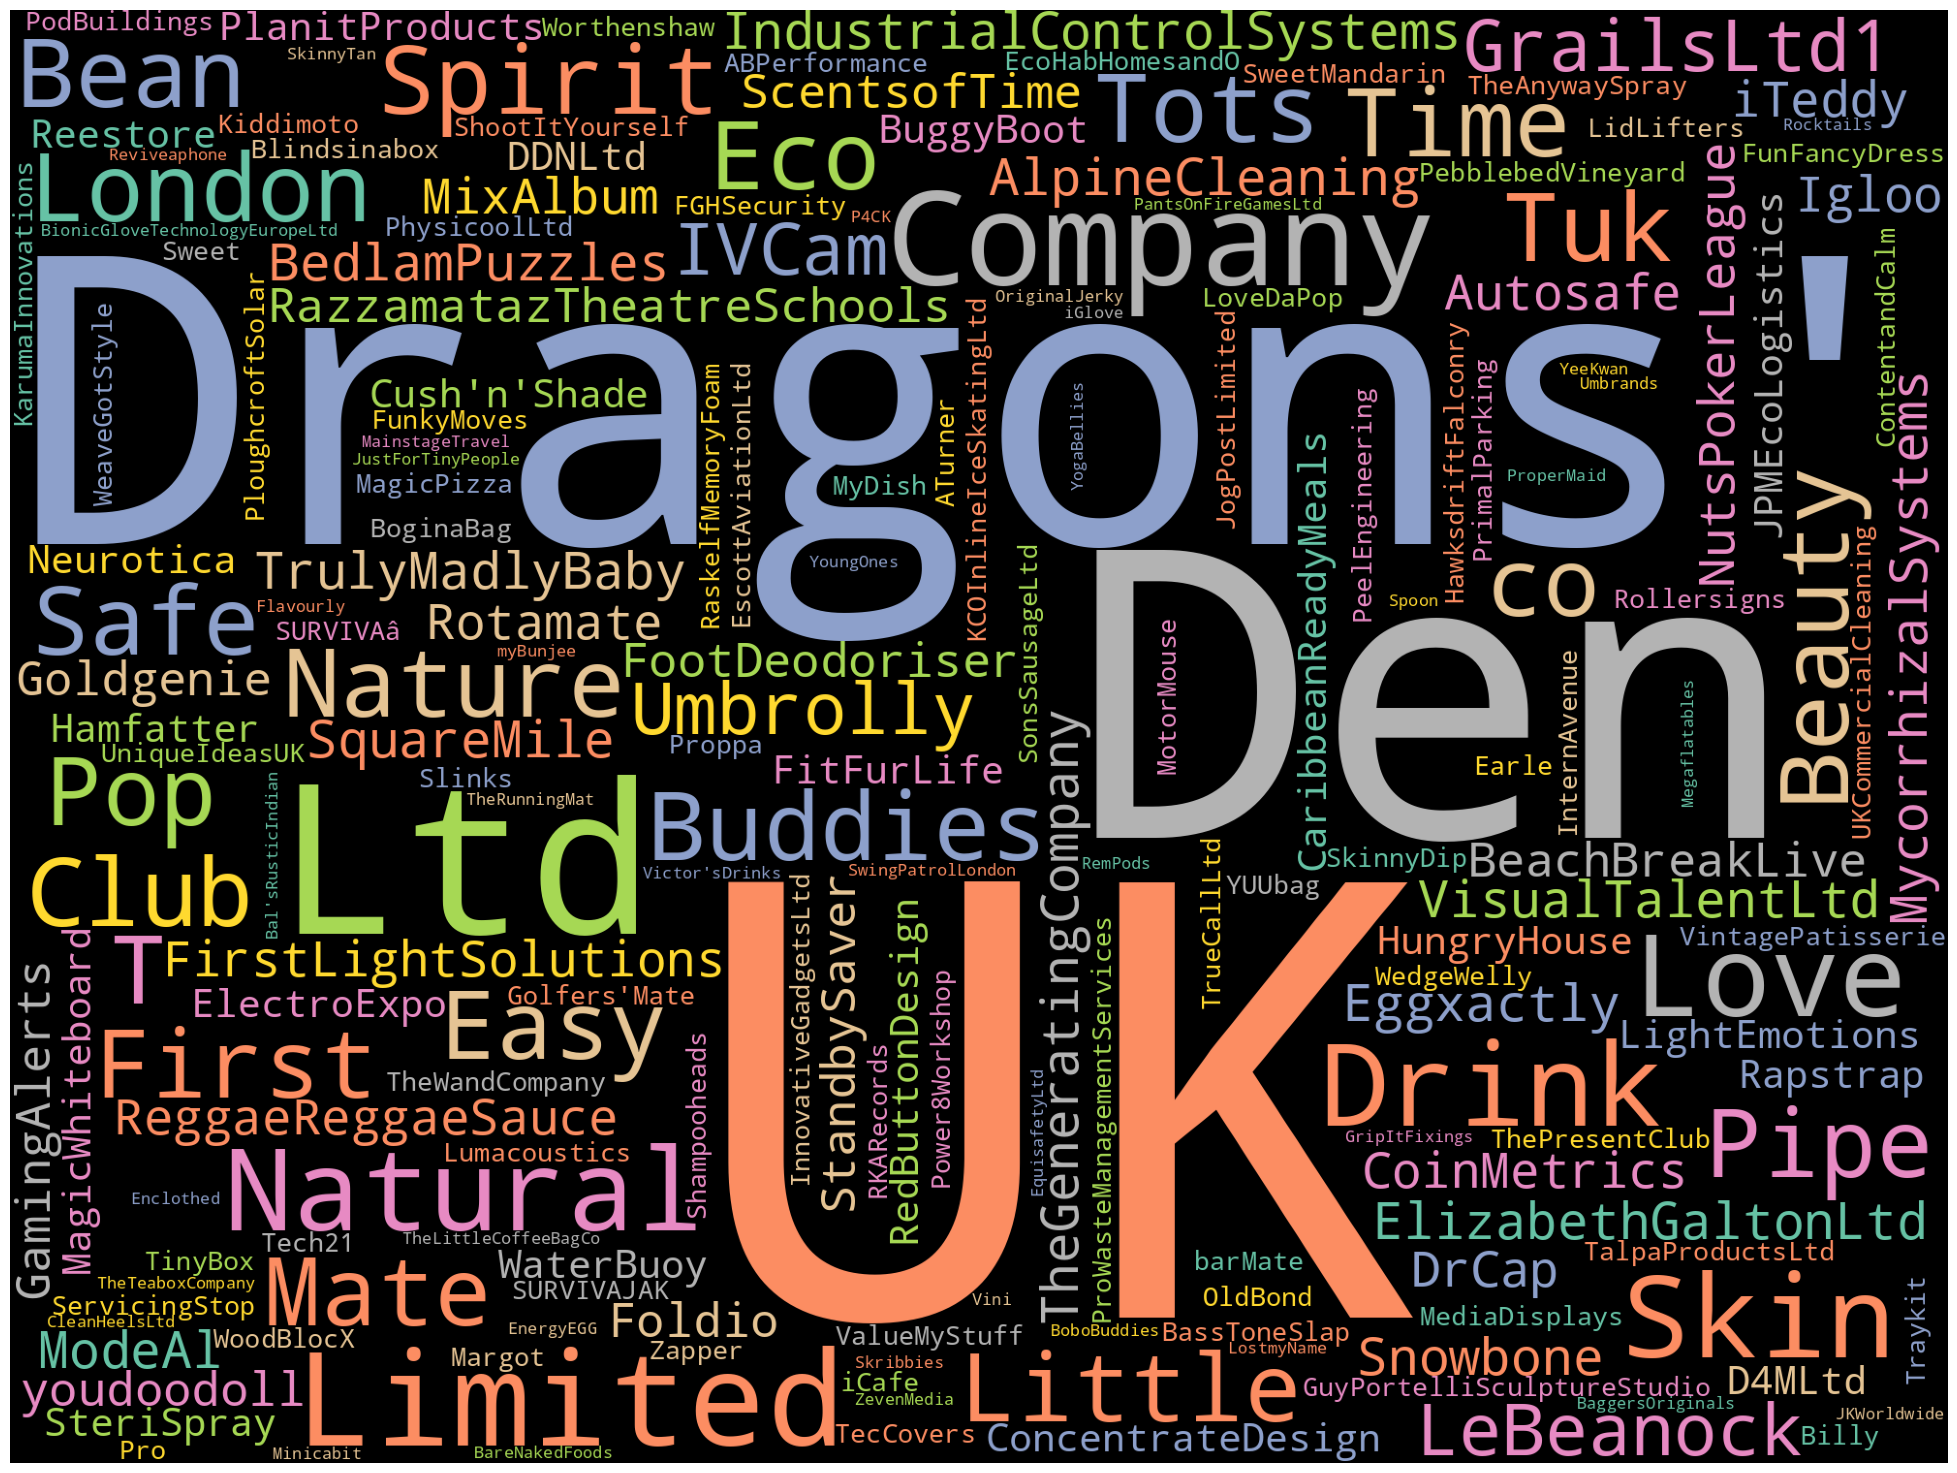

In [45]:
# Word cloud based on Startup Names, in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [46]:
# # Word cloud based on Startup Names, in current/latest season (21st season)
# text = " Dragons' Den UK season21 ".join(cat for cat in dragons_den_recent['Startup Name'])
# stop_words = list(STOPWORDS)
# wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2024).generate(text)
# plt.figure(figsize=(18,15))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥 Peter Jones's Investments

Total investments by Peter Jones  64
Investment amount by Peter Jones £3,054,834.33
Equity received by Peter Jones 1204.49 % in different companies

Company details:
------------------------------------------------------------------------------------------
                    Startup Name                Industry  Peter Jones Investment Amount
                        Umbrolly       Business Services                    75000.00000
                 VisualTalentLtd          Fashion/Beauty                   175000.00000
                      SquareMile          Lifestyle/Home                    75000.00000
            TheGeneratingCompany Fitness/Sports/Outdoors                    80000.00000
               ReggaeReggaeSauce       Food and Beverage                    25000.00000
                          iTeddy       Business Services                    70000.00000
                    ScentsofTime          Fashion/Beauty                    40000.00000
               ConcentrateDesign      C

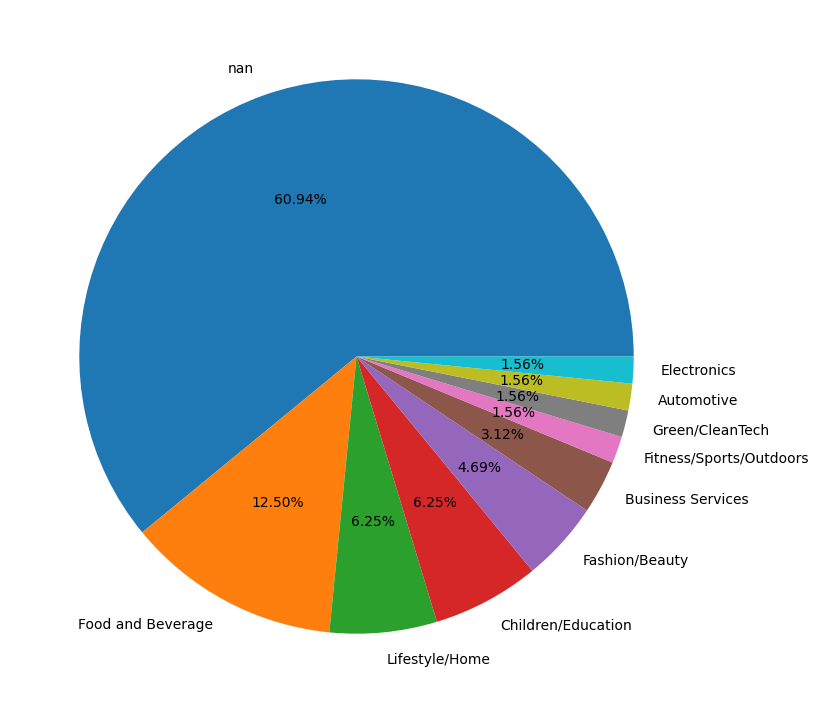

In [47]:
print("Total investments by Peter Jones", dragons_den[dragons_den['Peter Jones Investment Amount']>0][['Peter Jones Investment Amount']].count().to_string()[-3:])
print("Investment amount by Peter Jones", format_currency(dragons_den['Peter Jones Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Peter Jones", round(dragons_den['Peter Jones Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0][["Startup Name","Industry","Peter Jones Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nPeter Jones industry wise investments\n")
print(dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0] [["Startup Name","Peter Jones Investment Amount","Peter Jones Investment Equity"]].sort_values(by="Peter Jones Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peter Jones Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Deborah Meaden's Investments

Total investments by Deborah Meaden  55
Investment amount by Deborah Meaden £2,553,167.67
Equity received by Deborah Meaden 947.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name           Industry  Deborah Meaden Investment Amount
                   MixAlbum      Software/Tech                       75000.00000
                 youdoodoll Children/Education                       35000.00000
                   Reestore    Green/CleanTech                       25000.00000
                 SteriSpray     Fashion/Beauty                       72500.00000
            JPMEcoLogistics         Automotive                       50000.00000
                  BuggyBoot  Business Services                       80000.00000
            MagicWhiteboard Children/Education                       50000.00000
 ProWasteManagementServices    Green/CleanTech                      100000.00000
       

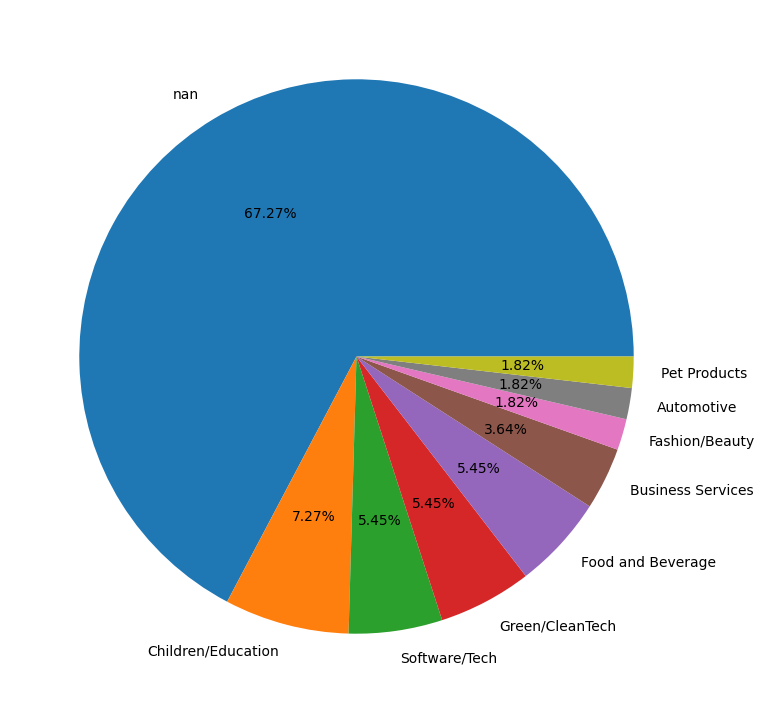

In [48]:
print("Total investments by Deborah Meaden", dragons_den[dragons_den['Deborah Meaden Investment Amount']>0][['Deborah Meaden Investment Amount']].count().to_string()[-3:])
print("Investment amount by Deborah Meaden", format_currency(dragons_den['Deborah Meaden Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Deborah Meaden", round(dragons_den['Deborah Meaden Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0][["Startup Name","Industry","Deborah Meaden Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDeborah Meaden industry wise investments\n")
print(dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0] [["Startup Name","Deborah Meaden Investment Amount","Deborah Meaden Investment Equity"]].sort_values(by="Deborah Meaden Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Deborah Meaden Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Duncan Bannatyne's Investments

Total investments by Duncan Bannatyne  14
Investment amount by Duncan Bannatyne £995,000
Equity received by Duncan Bannatyne 371.25 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name           Industry  Duncan Bannatyne Investment Amount
                  Umbrolly  Business Services                             75000.0
                     Igloo  Business Services                             80000.0
  RazzamatazTheatreSchools Children/Education                             50000.0
       CaribbeanReadyMeals  Food and Beverage                             50000.0
               ElectroExpo        Electronics                             75000.0
                    D4MLtd  Business Services                             37500.0
                  Rapstrap    Green/CleanTech                             75000.0
              Blindsinabox     Lifestyle/Home                             2000

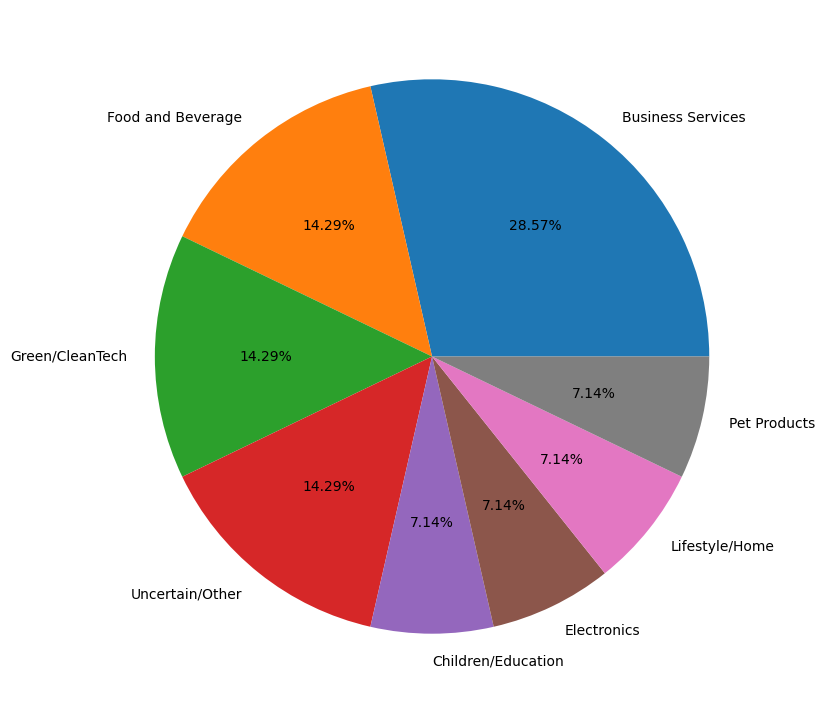

In [49]:
print("Total investments by Duncan Bannatyne", dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0][['Duncan Bannatyne Investment Amount']].count().to_string()[-3:])
print("Investment amount by Duncan Bannatyne", format_currency(dragons_den['Duncan Bannatyne Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Duncan Bannatyne", round(dragons_den['Duncan Bannatyne Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0][["Startup Name","Industry","Duncan Bannatyne Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDuncan Bannatyne industry wise investments\n")
print(dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0] [["Startup Name","Duncan Bannatyne Investment Amount","Duncan Bannatyne Investment Equity"]].sort_values(by="Duncan Bannatyne Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Duncan Bannatyne Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Theo Paphitis's Investments

Total investments by Theo Paphitis  20
Investment amount by Theo Paphitis £1,191,666.67
Equity received by Theo Paphitis 50400.83 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name                Industry  Theo Paphitis Investment Amount
                SquareMile          Lifestyle/Home                      75000.00000
      TheGeneratingCompany Fitness/Sports/Outdoors                      80000.00000
                  MixAlbum           Software/Tech                      75000.00000
                    iTeddy       Business Services                      70000.00000
                    Foldio          Lifestyle/Home                      80000.00000
              ScentsofTime          Fashion/Beauty                      40000.00000
              GamingAlerts           Software/Tech                     200000.00000
                  Reestore         Green/CleanTech              

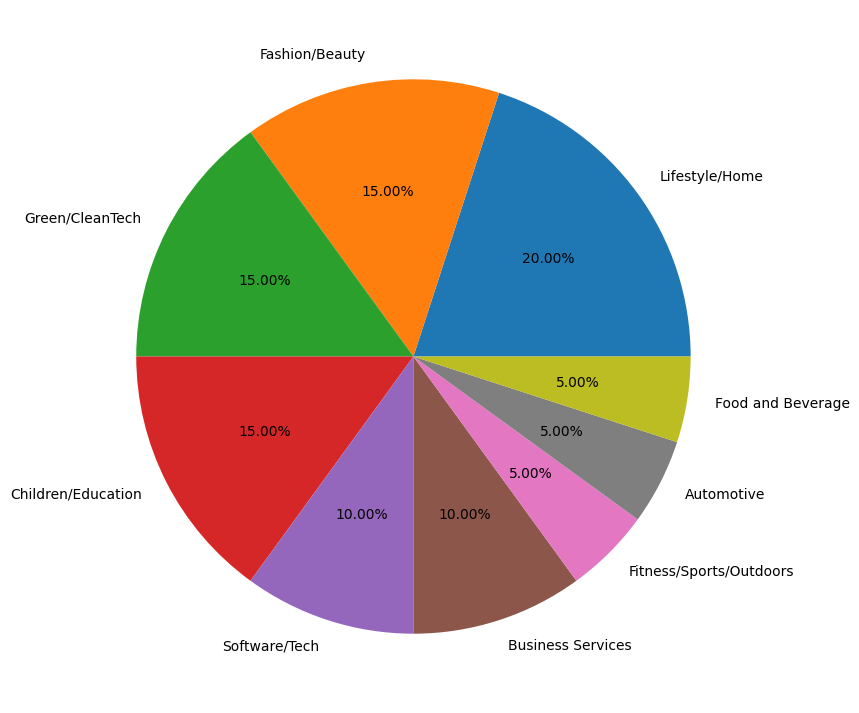

In [50]:
print("Total investments by Theo Paphitis", dragons_den[dragons_den['Theo Paphitis Investment Amount']>0][['Theo Paphitis Investment Amount']].count().to_string()[-3:])
print("Investment amount by Theo Paphitis", format_currency(dragons_den['Theo Paphitis Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Theo Paphitis", round(dragons_den['Theo Paphitis Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0][["Startup Name","Industry","Theo Paphitis Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTheo Paphitis industry wise investments\n")
print(dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0] [["Startup Name","Theo Paphitis Investment Amount","Theo Paphitis Investment Equity"]].sort_values(by="Theo Paphitis Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Theo Paphitis Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾  Touker Suleyman's Investments

Total investments by Touker Suleyman  31
Investment amount by Touker Suleyman £1,400,374.33
Equity received by Touker Suleyman 598.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name          Industry  Touker Suleyman Investment Amount
                  BeamBlock               nan                        25000.00000
              TimberkitsLtd               nan                        40000.00000
                 Liquiproof    Fashion/Beauty                       100000.00000
                 BadBrownie Food and Beverage                        60000.00000
                 Boot Buddy               nan                        20000.00000
        Kokoso Skin Limited               nan                        50000.00000
   The Wool Couture Company               nan                        25000.00000
             Nana's Manners               nan                        50000.00000
    

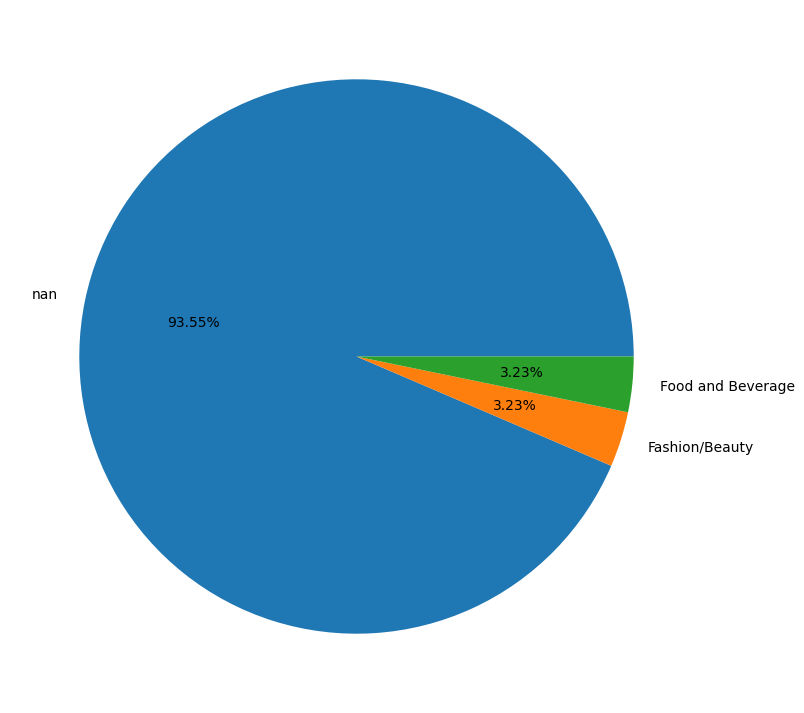

In [51]:
print("Total investments by Touker Suleyman", dragons_den[dragons_den['Touker Suleyman Investment Amount']>0][['Touker Suleyman Investment Amount']].count().to_string()[-3:])
print("Investment amount by Touker Suleyman", format_currency(dragons_den['Touker Suleyman Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Touker Suleyman", round(dragons_den['Touker Suleyman Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0][["Startup Name","Industry","Touker Suleyman Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTouker Suleyman industry wise investments\n")
print(dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0] [["Startup Name","Touker Suleyman Investment Amount","Touker Suleyman Investment Equity"]].sort_values(by="Touker Suleyman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Touker Suleyman Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Sara Davies's Investments

Total investments by Sara Davies  27
Investment amount by Sara Davies £1,256,667.67
Equity received by Sara Davies 531.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
         Startup Name Industry  Sara Davies Investment Amount
             Tancream      nan                    37500.00000
              Mak Tok      nan                    60000.00000
            Pipe Easy      nan                    41000.00000
     Drynks Unlimited      nan                   125000.00000
               Nimble      nan                    28333.33333
              Fliptop      nan                    10000.00000
          Peachy Lean      nan                    33333.33333
   Trapped in the Web      nan                    30000.00000
     Beach Powder Ltd      nan                    30000.00000
          Willsow Ltd      nan                    20000.00000
            Easy Tots      nan                    80000.00000
 

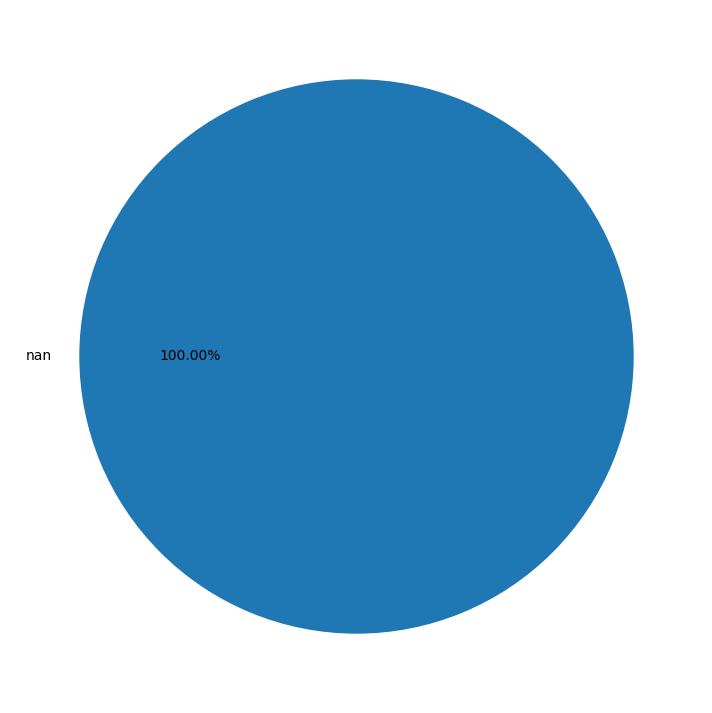

In [52]:
print("Total investments by Sara Davies", dragons_den[dragons_den['Sara Davies Investment Amount']>0][['Sara Davies Investment Amount']].count().to_string()[-3:])
print("Investment amount by Sara Davies", format_currency(dragons_den['Sara Davies Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Sara Davies", round(dragons_den['Sara Davies Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0][["Startup Name","Industry","Sara Davies Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSara Davies industry wise investments\n")
print(dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0] [["Startup Name","Sara Davies Investment Amount","Sara Davies Investment Equity"]].sort_values(by="Sara Davies Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sara Davies Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 All Guest's Investments
#### (Dragon who presented in fewer seasons)

Total investments by all Guests 82
Investment amount by all Guests £4,759,334
Equity received by all Guests 1516.38 % in different companies

Company details:
--------------------------------------------------------------------------------------------
                    Startup Name           Industry  Guest Investment Amount         Invested Guest Name
                      GrailsLtd1     Fashion/Beauty             120000.00000   DougRichard,RachelElnaugh
                       LeBeanock     Lifestyle/Home              54000.00000               RachelElnaugh
             FirstLightSolutions  Business Services             100000.00000             RichardFarleigh
               ReggaeReggaeSauce  Food and Beverage              25000.00000             RichardFarleigh
                           Igloo  Business Services              80000.00000             RichardFarleigh
                       Goldgenie     Lifestyle/Home              60000.00000                   JamesCaan
             

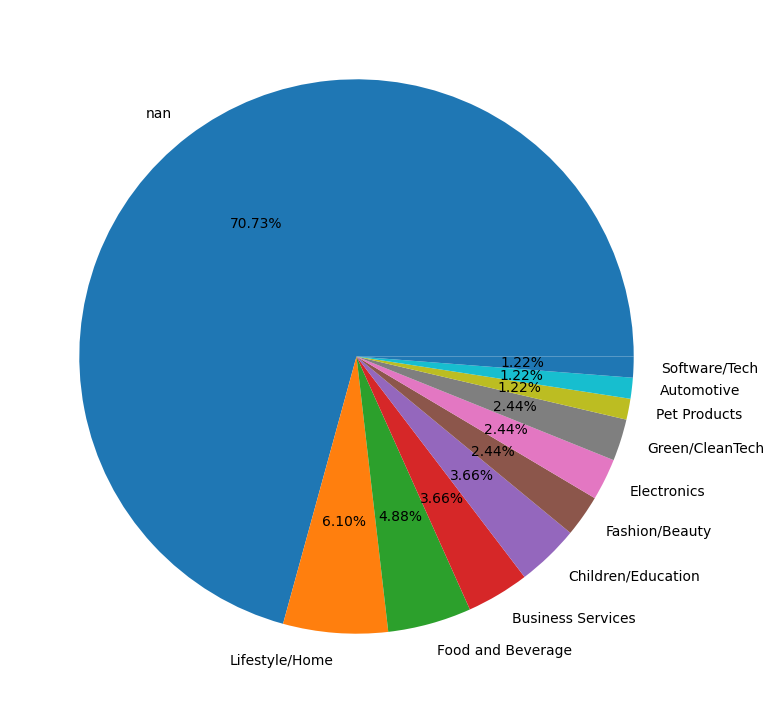

In [53]:
print("Total investments by all Guests", dragons_den[dragons_den['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(dragons_den['Guest Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(dragons_den['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(dragons_den.loc[dragons_den['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Invested Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [54]:
# Guest sharks and number of companies they invested
dragons_den.loc[dragons_den['Guest Investment Amount'] > 1]['Invested Guest Name'].str.split(',').explode('Invested Guest Name').value_counts().sort_values(ascending=False)

Invested Guest Name
Steven Bartlett    19
Tej Lalvani        14
JamesCaan          11
NickJenkins         9
TejLalvani          6
KellyHoppen         5
PiersLinney         4
SarahWillingham     4
JennyCampbell       4
RichardFarleigh     3
Jenny Campbell      3
RachelElnaugh       2
HilaryDevey         2
DougRichard         1
Emma Grede          1
Name: count, dtype: int64

In [55]:
# Investment amount by guests, in GBP
tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount'] > 0][['Invested Guest Name','Guest Investment Amount']]
tmpdf['Number of Guests'] = tmpdf['Invested Guest Name'].str.count(',') + 1
tmpdf['Invetested Amount per Guest'] = tmpdf['Guest Investment Amount'] / tmpdf['Number of Guests']
tmpdf = tmpdf.set_index(tmpdf.columns.drop('Invested Guest Name',1).tolist())['Invested Guest Name'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Invested Guest Name'}).loc[:, tmpdf.columns]
round(tmpdf.groupby(["Invested Guest Name"])["Invetested Amount per Guest"].sum().sort_values(ascending=False))

Invested Guest Name
Steven Bartlett    1134001.0
JamesCaan           724167.0
Tej Lalvani         572166.0
NickJenkins         467500.0
TejLalvani          327500.0
PiersLinney         280000.0
Jenny Campbell      215000.0
RichardFarleigh     205000.0
SarahWillingham     177500.0
KellyHoppen         155000.0
JennyCampbell       150000.0
HilaryDevey         117500.0
RachelElnaugh       114000.0
DougRichard          60000.0
Emma Grede           60000.0
Name: Invetested Amount per Guest, dtype: float64

Number of Dragons in Deal
1.0    124
2.0     72
3.0      7
5.0      2
Name: count, dtype: int64 

Number of Dragons in Deal
1.0    60%
2.0    35%
3.0     3%
5.0     1%
Name: proportion, dtype: object


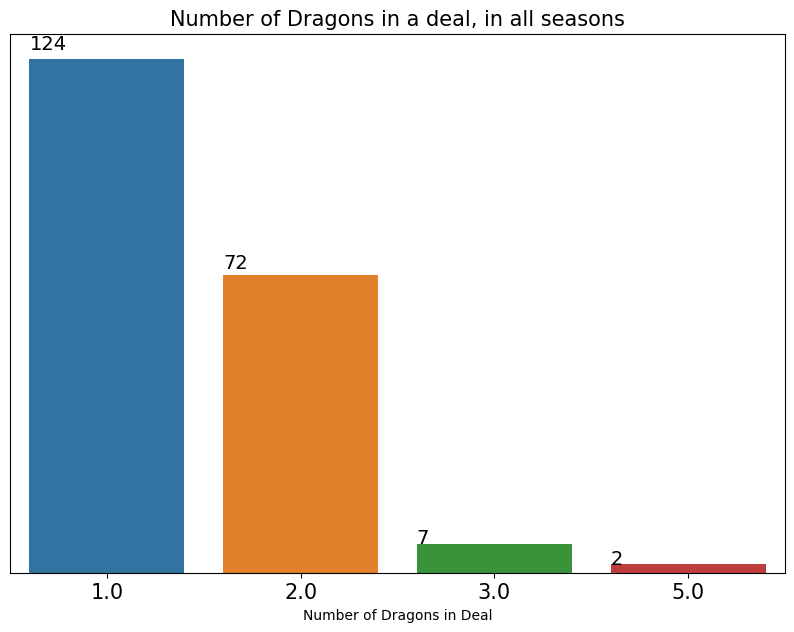

In [56]:
# Number of Dragons in a deal, in all seasons
print(dragons_den['Number of Dragons in Deal'].value_counts(), "\n")

# In percentage
print(round(dragons_den['Number of Dragons in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of Dragons in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = dragons_den, x = 'Number of Dragons in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [57]:
# All Dragons deals
print(dragons_den.loc[dragons_den['Number of Dragons in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number  Startup Name  Total Deal Amount  Total Deal Equity
383             20    Mood Bears            20000.0               25.0
396             21  Sopper Books                5.0                5.0


In [58]:
# Dragons with most number of solo deals
amt_cols = dragons_den.columns[dragons_den.columns.str.contains(' Investment Amount')].tolist()
tmp = dragons_den.loc[dragons_den['Number of Dragons in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# PeterJones did most number of solo deals, than any other Dragon

Guest Investment Amount             39
Peter Jones Investment Amount       23
Deborah Meaden Investment Amount    23
dtype: int64

In [59]:
# Dragons with most number of episode presence, in all seasons
present_cols = dragons_den.columns[dragons_den.columns.str.endswith(' Present')].tolist()
tmp = dragons_den[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Peter Jones was there in most number of episodes

Guest Present             85.0
Peter Jones Present       64.0
Deborah Meaden Present    55.0
dtype: float64

In [60]:
# # Top 25 UK states of pitcher's
# tmp = dragons_den['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [61]:
# # Top 20 UK cities
# tmp = dragons_den['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 British cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [62]:
# Most frequently asked amount, by startups
dragons_den.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked

Original Ask Amount
50000     113
100000     58
75000      51
80000      35
60000      33
70000      16
150000     15
40000      13
200000      9
30000       7
dtype: int64

In [63]:
# Most frequently offered equity, by startups
dragons_den.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
25.0    66
30.0    66
40.0    65
20.0    41
10.0    30
35.0    27
50.0    20
15.0    19
45.0    15
5.0      8
dtype: int64

In [64]:
# ✅ Most frequently invested amount, by Dragons
dragons_den.groupby('Total Deal Amount').size().nlargest(10)

# Dragons mostly invested more than 100K per deal

# Total Deal Amount (GBP) and Number times invested

Total Deal Amount
50000.0     61
75000.0     23
60000.0     21
80000.0     21
100000.0    19
150000.0     9
70000.0      6
40000.0      4
120000.0     4
30000.0      3
dtype: int64

In [65]:
# ✅ Most frequently received total equity, by Dragons
dragons_den.groupby('Total Deal Equity').size().nlargest(10)

# Dragons are expecting more than 25% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
30.0    35
25.0    34
40.0    28
20.0    22
10.0    19
35.0    11
15.0     9
45.0     9
50.0     9
5.0      5
dtype: int64

In [66]:
# Most frequently asked amount (in GBP), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
50000              54.0                46.0
75000              47.0                53.0
80000              57.0                43.0
60000              61.0                39.0
100000             33.0                67.0
150000             60.0                40.0
70000              44.0                56.0
200000             33.0                67.0
40000              23.0                77.0
25000              75.0                25.0

In [67]:
# Frequently asked amount (in GBP), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
72000               0.0               100.0
110000              0.0               100.0
37500               0.0               100.0
95000               0.0               100.0
225000              0.0               100.0
66000               0.0               100.0
175000            100.0                 0.0
145000            100.0                 0.0
140000            100.0                 0.0
136000            100.0                 0.0

In [68]:
# Most frequently asked equity, deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
30.0             53.0                47.0
25.0             52.0                48.0
40.0             43.0                57.0
20.0             54.0                46.0
10.0             63.0                37.0
35.0             41.0                59.0
50.0             45.0                55.0
45.0             60.0                40.0
15.0             47.0                53.0
5.0              62.0                38.0

In [69]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
2.5                0.0               100.0
48.0               0.0               100.0
44.0               0.0               100.0
39.0               0.0               100.0
23.0               0.0               100.0
22.0               0.0               100.0
18.0               0.0               100.0
16.0               0.0               100.0
24.0               0.0               100.0
100.0              0.0               100.0

In [70]:
# Mostly successful combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in UK Dragons' Den, ask for 50K-150K with 30-40% equity ✅

Original Ask Amount  Original Offered Equity
50000                25.0                       14
                     30.0                       14
                     20.0                        9
                     10.0                        8
100000               40.0                        6
60000                30.0                        5
                     40.0                        4
75000                25.0                        4
80000                25.0                        4
                     30.0                        4
dtype: int64

In [71]:
# Most frequently asked amount, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked (but rejected by Dragons) ❌

Original Ask Amount
50000     52
100000    39
75000     27
80000     15
60000     13
40000     10
70000      9
150000     6
200000     6
30000      4
dtype: int64

In [72]:
# Most frequently offered equity, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by Dragons) ❌

Original Offered Equity
40.0    37
25.0    32
30.0    31
20.0    19
35.0    16
10.0    11
50.0    11
15.0    10
33.0     6
45.0     6
dtype: int64

In [73]:
# Mostly rejected combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Dragons' Den US, don't ask for 100K with 50% equity or 50K with 20-40% equity 🔴

Original Ask Amount  Original Offered Equity
50000                40.0                       10
                     30.0                        9
100000               30.0                        8
50000                20.0                        7
                     25.0                        6
100000               40.0                        6
75000                20.0                        5
                     25.0                        5
                     40.0                        5
100000               10.0                        5
dtype: int64

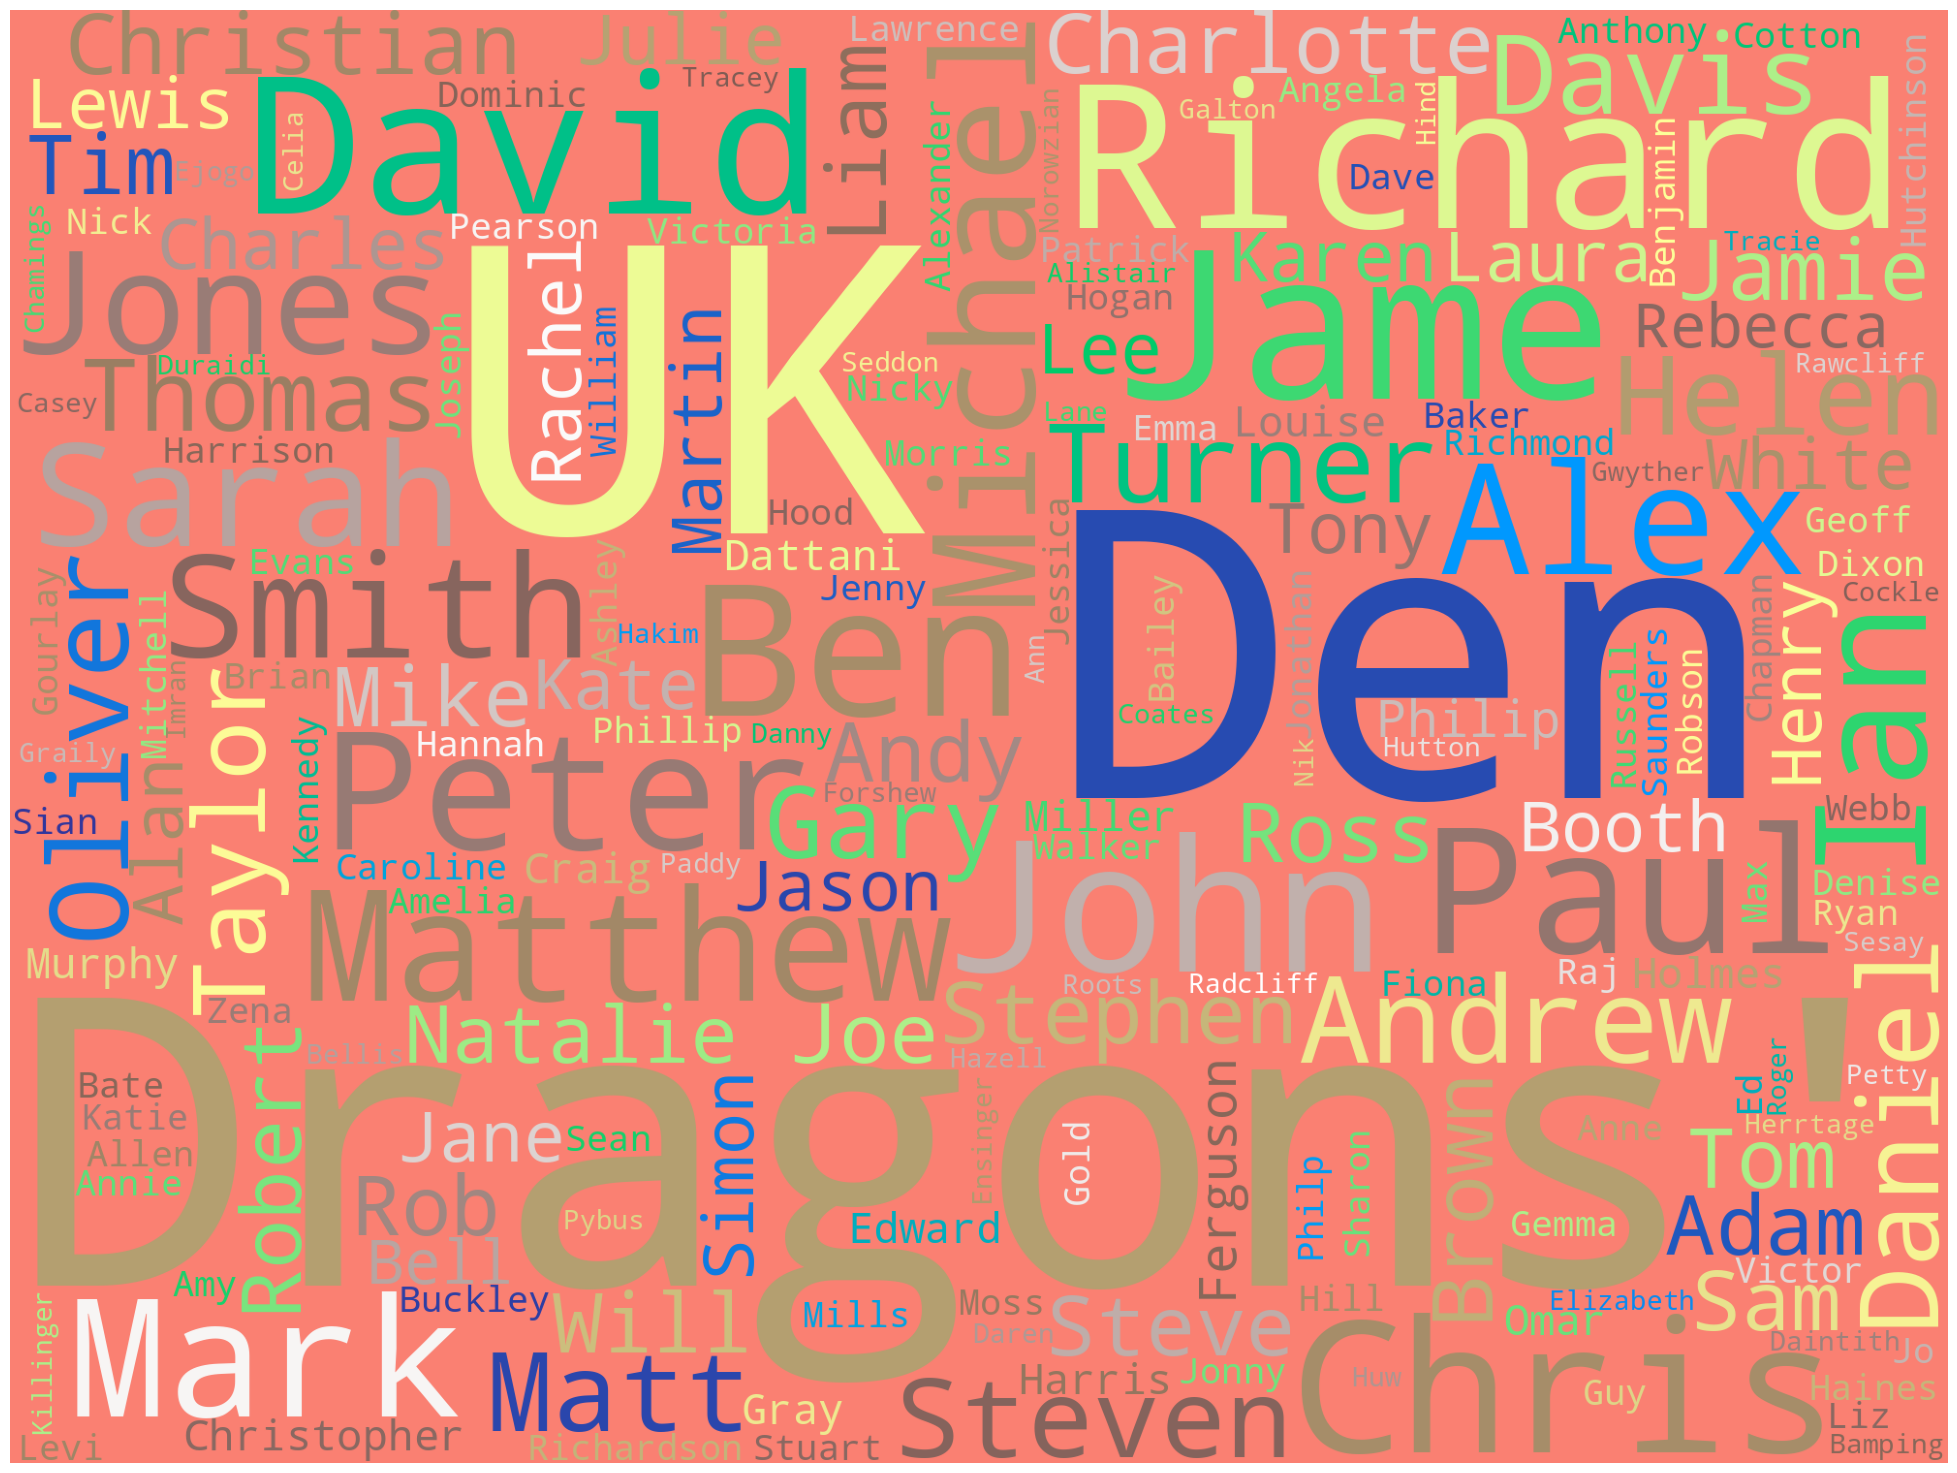

In [74]:
# Word cloud based on Pitcher name
text = " Dragons' Den UK ".join(cat for cat in dragons_den['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [75]:
# Many (8) companies got more amount than they asked/expected
print(dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    8
dtype: int64


Season Number                Startup Name  Original Ask Amount  \
48               6                   Neurotica                56000   
55               6  GuyPortelliSculptureStudio                70000   
58               6                     TinyBox                53000   
74               7                  MotorMouse               100000   
171             13               TimberkitsLtd                25000   
238             16         Look After My Bills                90000   
333             19             The Little Loop                75000   
336             19      Little Hoppa by Sophie                75000   

     Total Deal Amount  
48             75000.0  
55             80000.0  
58             60000.0  
74            120000.0  
171            40000.0  
238           120000.0  
333           140000.0  
336           100000.0

In [76]:
# Most of the companies not diluted/gave their company equity more than they initially offered/expected
dragons_den.loc[dragons_den['Original Offered Equity'] < dragons_den["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Original Offered Equity, Total Deal Equity]
Index: []

In [77]:
# Below (197) companies got the same valuation they requested (with or without loan)
print(dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    197
dtype: int64


Season Number       Startup Name  Valuation Requested  Deal Valuation
0                1           Umbrolly               375000        375000.0
1                1         GrailsLtd1               300000        300000.0
2                1          LeBeanock               110204        110204.0
7                1    VisualTalentLtd               437500        437500.0
8                2         SquareMile               375000        375000.0
..             ...                ...                  ...             ...
403             21        Tasty Mates               300000        300000.0
405             21            Sibstar              1250000       1250000.0
407             21  Zebedee Any Angle               187500        187500.0
412             21               Skin               500000        500000.0
415             21    Yard Art UK Ltd               142857        142857.0

[197 rows x 4 columns]

In [78]:
# There are 8 companies which got more valuation than they pitched
print(dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    8
dtype: int64


Season Number                Startup Name  Valuation Requested  \
48               6                   Neurotica               160000   
55               6  GuyPortelliSculptureStudio               280000   
58               6                     TinyBox               132500   
74               7                  MotorMouse               250000   
171             13               TimberkitsLtd                83333   
238             16         Look After My Bills              3000000   
333             19             The Little Loop               300000   
336             19      Little Hoppa by Sophie               166667   

     Deal Valuation  
48         214286.0  
55         320000.0  
58         150000.0  
74         300000.0  
171        133333.0  
238       4000000.0  
333        560000.0  
336        222222.0

In [79]:
# # Episodes which got most TRP
# print("Maximum viewership in UK:", dragons_den['UK Viewership'].max(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']>=dragons_den['UK Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership",ascending=False).to_string(index=False))

In [80]:
# # Episodes which got least TRP
# print("Minimum viewership in United Kingdom:", dragons_den['UK Viewership'].min(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']<=dragons_den['UK Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership").to_string(index=False))

Multiple Entrepreneurs
0    240
1    176
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    58%
1    42%
Name: proportion, dtype: object


<Axes: ylabel='count'>

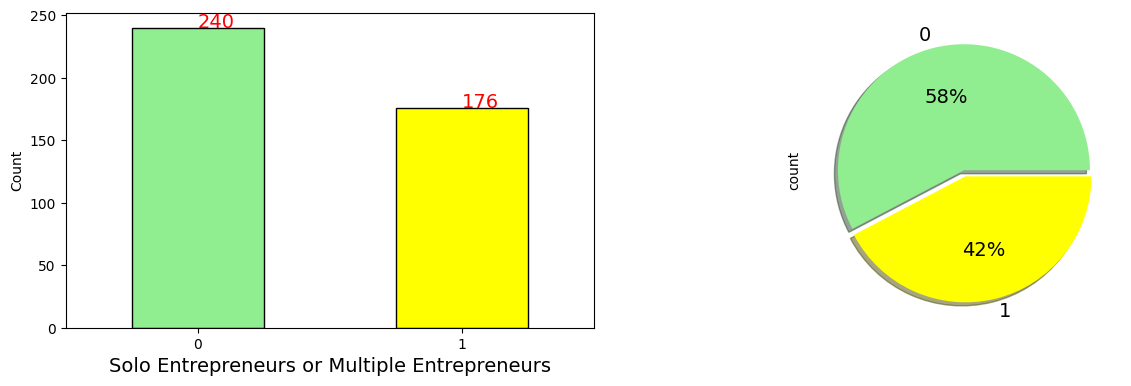

In [81]:
# Solo or multiple Entrepreneurs ?
print(dragons_den['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(dragons_den['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

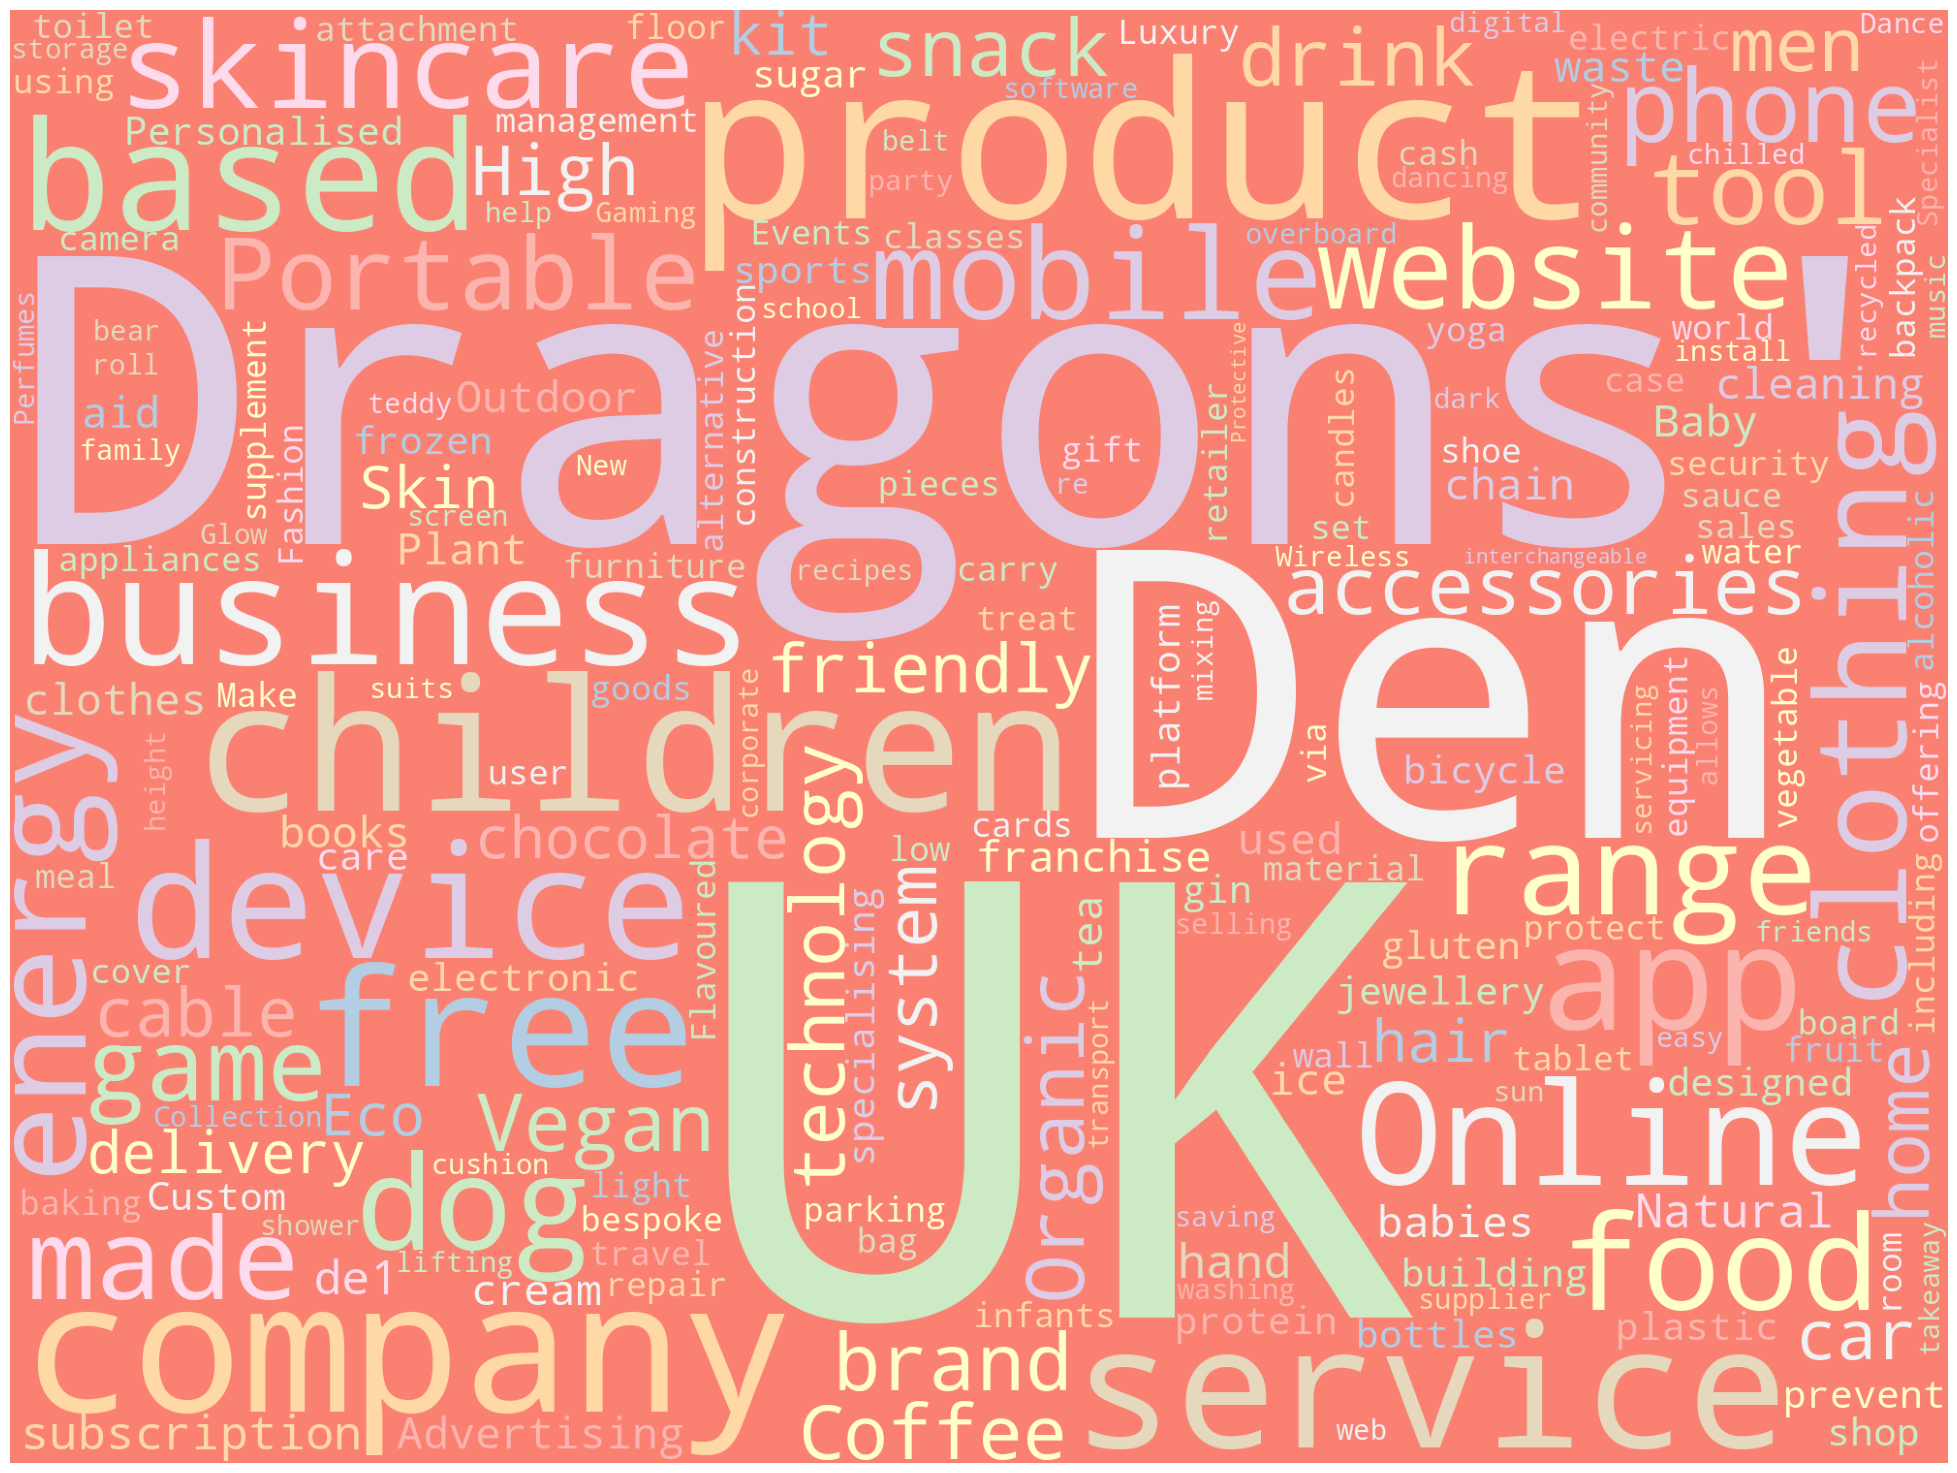

In [82]:
# Word cloud based on Business Description of startups came in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den.loc[dragons_den['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [83]:
# Correlation matrix
dragons_den.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [84]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.22.0

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.22.0


In [85]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [86]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [87]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [88]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Number of Dragons in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [89]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Investment Amount Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [90]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Equity Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [91]:
dragons_den.loc[round(dragons_den['Total Deal Amount'].fillna(0),1) != round(dragons_den['Peter Jones Investment Amount'].fillna(0) + dragons_den['Deborah Meaden Investment Amount'].fillna(0) + dragons_den['Duncan Bannatyne Investment Amount'].fillna(0) + dragons_den['Theo Paphitis Investment Amount'].fillna(0) + dragons_den['Touker Suleyman Investment Amount'].fillna(0) + dragons_den['Sara Davies Investment Amount'].fillna(0) + dragons_den['Guest Investment Amount'].fillna(0), 1)]

Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
192             14  Iveson & Sage               3           193    24-Jul-16   
280             17         Nimble               9           281    11-Aug-19   
393             21   Pavan Beauty               4           394     4-Jan-24   

    Season End Original Air Date Industry       Business Description  \
192  26-Feb-17          7-Aug-16      nan         Womenswear company   
280  12-Apr-20          8-Mar-20      nan  Plant-based Baby Products   
393   4-Apr-24         26-Jan-24      nan  South Asian beauty regime   

     Company Website  Pitchers Gender  Pitchers Average Age  Pitchers City  \
192              NaN              NaN                   NaN            NaN   
280              NaN              NaN                   NaN            NaN   
393              NaN              NaN                   NaN            NaN   

     Pitchers State                 Entrepreneur Names  \
192             NaN  Sarah Sleightolm and Beth Chilton   
280             NaN                             Von Sy   
393             NaN                      Pavan Dhanjal   

     Multiple Entrepreneurs  UK Viewership  Original Ask Amount  \
192                       1            NaN                78000   
280                       0            NaN                85000   
393                       0            NaN                50000   

     Original Offered Equity  Valuation Requested  Got Deal  \
192                     25.0               312000         1   
280                     45.0               188889         1   
393                     40.0               125000         1   

     Total Deal Amount  Total Deal Equity  Deal Valuation  \
192            78000.0               25.0        312000.0   
280            85000.0               45.0        188889.0   
393            50000.0               40.0        125000.0   

     Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
192                        2.0  ...                     NaN   NaN   
280                        3.0  ...                     NaN   NaN   
393                        1.0  ...                     NaN   NaN   

     Deal Has Conditions  Peter Jones Investment Amount  \
192                  yes                        20000.0   
280                  yes                            NaN   
393                  yes                            NaN   

     Peter Jones Investment Equity Deborah Meaden Investment Amount  \
192                           10.0                          20000.0   
280                            NaN                              NaN   
393                            NaN                              NaN   

     Deborah Meaden Investment Equity  Duncan Bannatyne Investment Amount  \
192                              10.0                                 NaN   
280                               NaN                                 NaN   
393                               NaN                                 NaN   

     Duncan Bannatyne Investment Equity  Theo Paphitis Investment Amount  \
192                                 NaN                              NaN   
280                                 NaN                              NaN   
393                                 NaN                              NaN   

     Theo Paphitis Investment Equity  Touker Suleyman Investment Amount  \
192                              NaN                                NaN   
280                              NaN                        28333.33333   
393                          50000.0                           40.00000   

     Touker Suleyman Investment Equity  Sara Davies Investment Amount  \
192                                NaN                            NaN   
280                               15.0                    28333.33333   
393                                NaN                            NaN   

     Sara Davies Investment Equity  Guest Investment Amount  \
192         

In [92]:
dragons_den.loc[round(dragons_den['Total Deal Equity'].fillna(0),1) != round(dragons_den['Peter Jones Investment Equity'].fillna(0) + dragons_den['Deborah Meaden Investment Equity'].fillna(0) + dragons_den['Duncan Bannatyne Investment Equity'].fillna(0) + dragons_den['Theo Paphitis Investment Equity'].fillna(0) + dragons_den['Touker Suleyman Investment Equity'].fillna(0) + dragons_den['Sara Davies Investment Equity'].fillna(0) + dragons_den['Guest Investment Equity'].fillna(0), 1)]

Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
192             14  Iveson & Sage               3           193    24-Jul-16   
393             21   Pavan Beauty               4           394     4-Jan-24   

    Season End Original Air Date Industry       Business Description  \
192  26-Feb-17          7-Aug-16      nan         Womenswear company   
393   4-Apr-24         26-Jan-24      nan  South Asian beauty regime   

     Company Website  Pitchers Gender  Pitchers Average Age  Pitchers City  \
192              NaN              NaN                   NaN            NaN   
393              NaN              NaN                   NaN            NaN   

     Pitchers State                 Entrepreneur Names  \
192             NaN  Sarah Sleightolm and Beth Chilton   
393             NaN                      Pavan Dhanjal   

     Multiple Entrepreneurs  UK Viewership  Original Ask Amount  \
192                       1            NaN                78000   
393                       0            NaN                50000   

     Original Offered Equity  Valuation Requested  Got Deal  \
192                     25.0               312000         1   
393                     40.0               125000         1   

     Total Deal Amount  Total Deal Equity  Deal Valuation  \
192            78000.0               25.0        312000.0   
393            50000.0               40.0        125000.0   

     Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
192                        2.0  ...                     NaN   NaN   
393                        1.0  ...                     NaN   NaN   

     Deal Has Conditions  Peter Jones Investment Amount  \
192                  yes                        20000.0   
393                  yes                            NaN   

     Peter Jones Investment Equity Deborah Meaden Investment Amount  \
192                           10.0                          20000.0   
393                            NaN                              NaN   

     Deborah Meaden Investment Equity  Duncan Bannatyne Investment Amount  \
192                              10.0                                 NaN   
393                               NaN                                 NaN   

     Duncan Bannatyne Investment Equity  Theo Paphitis Investment Amount  \
192                                 NaN                              NaN   
393                                 NaN                              NaN   

     Theo Paphitis Investment Equity  Touker Suleyman Investment Amount  \
192                              NaN                                NaN   
393                          50000.0                               40.0   

     Touker Suleyman Investment Equity  Sara Davies Investment Amount  \
192                                NaN                            NaN   
393                                NaN                            NaN   

     Sara Davies Investment Equity  Guest Investment Amount  \
192                            NaN                      NaN   
393                            NaN                      NaN   

     Guest Investment Equity  Invested Guest Name  Peter Jones Present  \
192                      NaN                  NaN                  1.0   
393                      NaN                  NaN                  NaN   

     Deborah Meaden Present Duncan Bannatyne Present  Theo Paphitis Present  \
192                     1.0                      NaN                    NaN   
393                     NaN                      NaN                    NaN   

     Touker Suleyman Present  Sara Davies Present  Guest Present  
192                      NaN                  NaN            NaN  
393                      1.0                  NaN            NaN  

[2 rows x 53 columns]

In [93]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].notnull()) & (dragons_den['Invested Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [94]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].isnull()) & (dragons_den['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [95]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] != 0) & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [96]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 0) & (dragons_den['Entrepreneur Names'].notnull() & dragons_den['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [97]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 1) & (dragons_den['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number       Startup Name  Episode Number  Pitch Number  \
242             16  Infuse My. Colour               4           243   
278             17   Imperial Candles               8           279   

    Season Start Season End Original Air Date Industry  \
242    12-Aug-18   3-Feb-19          2-Sep-18      nan   
278    11-Aug-19  12-Apr-20         22-Dec-19      nan   

                           Business Description  Company Website  \
242  Natural vegetable dye colour wash shampoo.              NaN   
278              Jewelry Bath Bombs and Candles              NaN   

     Pitchers Gender  Pitchers Average Age  Pitchers City  Pitchers State  \
242              NaN                   NaN            NaN             NaN   
278              NaN                   NaN            NaN             NaN   

                     Entrepreneur Names  Multiple Entrepreneurs  \
242       Rob Forgione & Denis Kovalyov                       1   
278  Claudia Negoescu & Alexandru Ianas                       1   

     UK Viewership  Original Ask Amount  Original Offered Equity  \
242            NaN                80000                     25.0   
278            NaN               100000                     40.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
242               320000         1            80000.0               25.0   
278               250000         0                NaN                NaN   

     Deal Valuation  Number of Dragons in Deal  ...  Advisory Shares Equity  \
242        320000.0                        1.0  ...                     NaN   
278             NaN                        NaN  ...                     NaN   

     Loan  Deal Has Conditions  Peter Jones Investment Amount  \
242   NaN                  NaN                            NaN   
278   NaN                  NaN                            NaN   

     Peter Jones Investment Equity Deborah Meaden Investment Amount  \
242                            NaN                              NaN   
278                            NaN                              NaN   

     Deborah Meaden Investment Equity  Duncan Bannatyne Investment Amount  \
242                               NaN                                 NaN   
278                               NaN                                 NaN   

     Duncan Bannatyne Investment Equity  Theo Paphitis Investment Amount  \
242                                 NaN                              NaN   
278                                 NaN                              NaN   

     Theo Paphitis Investment Equity  Touker Suleyman Investment Amount  \
242                              NaN                                NaN   
278                              NaN                                NaN   

     Touker Suleyman Investment Equity  Sara Davies Investment Amount  \
242                                NaN                            NaN   
278                                NaN                            NaN   

     Sara Davies Investment Equity  Guest Investment Amount  \
242                            NaN                  80000.0   
278                            NaN                      NaN   

     Guest Investment Equity  Invested Guest Name  Peter Jones Present  \
242                     25.0          Tej Lalvani                  NaN   
278                      NaN                  NaN                  NaN   

     Deborah Meaden Present Duncan Bannatyne Present  Theo Paphitis Present  \
242                     NaN                      NaN                    NaN   
278                     NaN                      NaN                    NaN   

     Touker Suleyman Present  Sara Davies Present  Guest Present  
242                      NaN                  NaN            1.0  
278                      NaN                  NaN            NaN  

[2 rows x 53 columns]

In [98]:
dragons_den.loc[(dragons_den['Got Deal'] != 0) & (dragons_den['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [99]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [100]:
dragons_den.loc[(dragons_den['Pitchers Gender'] == 'Mixed Team') & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [101]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [102]:
dragons_den.loc[dragons_den['Total Deal Amount'] < dragons_den["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]